In [ ]:
#M22ai608-Frey Face-AE-q2

In [ ]:
#Implement variational Auto-encoders. Use the Frey Face dataset to train your network. Sample points
#from the learned distribution by varying different latent variables to show that your network has learned meaningful latent variables. Set the embedding vector size to 20.
#Dataset: https://cs.nyu.edu/∼roweis/data/frey rawface.mat

In [1]:
#Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
#C:\\Users\\Admin\\OneDrive\\Desktop\\m22ai608-BigData-assign3\\M22ai608-FreyFace-AE-q2\\frey_rawface.mat

In [3]:
# Load and preprocess the data
data = scipy.io.loadmat('C:\\Users\\Admin\\OneDrive\\Desktop\\m22ai608-BigData-assign3\\M22ai608-FreyFace-AE-q2\\frey_rawface.mat')
images = data['ff'].T  # Transpose to get the correct shape (num_samples, num_features)
images = images.astype(np.float32) / 255.0  # Normalize pixel values to the range [0, 1]

In [4]:
# Convert the data to PyTorch tensors
tensor_images = torch.tensor(images)

In [5]:
#  Define the Variational Autoencoder class
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU()
        )
        self.mu_layer = nn.Linear(hidden_size, latent_size)
        self.logvar_layer = nn.Linear(hidden_size, latent_size)
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )
        self.latent_size = latent_size

    def encode(self, x):
        encoded = self.encoder(x)
        mu = self.mu_layer(encoded)
        logvar = self.logvar_layer(encoded)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        z = mu + eps*std
        return z

    def decode(self, z):
        decoded = self.decoder(z)
        return decoded

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        decoded = self.decode(z)
        return decoded, mu, logvar

In [6]:
#  Create the VAE model with embedding vector size 20
input_size = images.shape[1]  # Number of features in each image
hidden_size = 128
latent_size = 20
vae = VAE(input_size, hidden_size, latent_size)

In [7]:
#  Define the loss function and optimizer
criterion = nn.BCELoss(reduction='sum')  # Binary cross-entropy loss for binary inputs
optimizer = optim.Adam(vae.parameters(), lr=0.001)

In [8]:
#  Train the VAE model
num_epochs = 50
batch_size = 64
num_samples = tensor_images.shape[0]
num_batches = num_samples // batch_size

for epoch in range(num_epochs):
    running_loss = 0.0
    indices = torch.randperm(num_samples)
    for i in range(num_batches):
        batch_indices = indices[i*batch_size : (i+1)*batch_size]
        batch = tensor_images[batch_indices]

        optimizer.zero_grad()

        outputs, mu, logvar = vae(batch)
        loss = criterion(outputs, batch)

        # Add KL divergence term to the loss
        kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        loss += kl_divergence

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / num_samples}")

print("Training finished.")

Epoch 1/50, Loss: 360.80636430502545
Epoch 2/50, Loss: 347.4597189090331
Epoch 3/50, Loss: 345.61177540553433
Epoch 4/50, Loss: 344.9934746739822
Epoch 5/50, Loss: 344.6508766698473
Epoch 6/50, Loss: 344.47575739503816
Epoch 7/50, Loss: 344.25133388994914
Epoch 8/50, Loss: 344.1155603928117
Epoch 9/50, Loss: 343.8751371660305
Epoch 10/50, Loss: 343.48869175413483
Epoch 11/50, Loss: 343.0396956504453
Epoch 12/50, Loss: 342.82550493002543
Epoch 13/50, Loss: 342.6859325302163
Epoch 14/50, Loss: 342.54751709605597
Epoch 15/50, Loss: 342.45017493638676
Epoch 16/50, Loss: 342.3198185034987
Epoch 17/50, Loss: 342.2619533237914
Epoch 18/50, Loss: 342.2028089217557
Epoch 19/50, Loss: 341.9692459844148
Epoch 20/50, Loss: 341.93251331902036
Epoch 21/50, Loss: 341.77296238867683
Epoch 22/50, Loss: 341.74980518447836
Epoch 23/50, Loss: 341.63975230597964
Epoch 24/50, Loss: 341.5484146389949
Epoch 25/50, Loss: 341.44897026081424
Epoch 26/50, Loss: 341.44886887722646
Epoch 27/50, Loss: 341.3642672550

In [9]:
#  Generate samples from the VAE model
vae.eval()
with torch.no_grad():
    num_samples_to_generate = 10
    samples = torch.randn(num_samples_to_generate, latent_size)
    generated_images = vae.decode(samples).numpy()

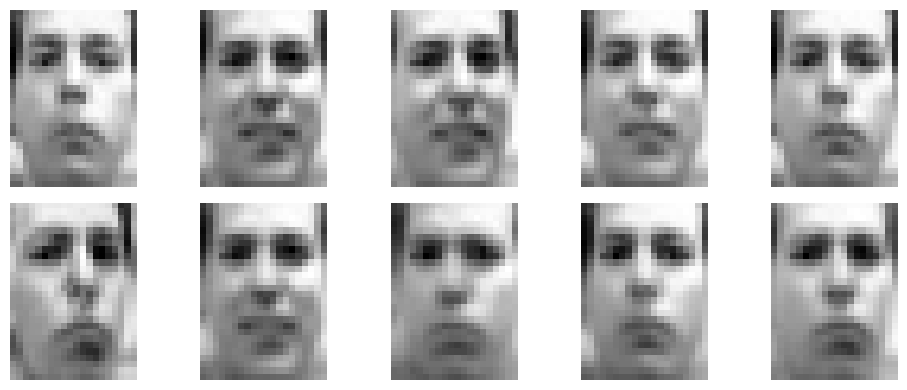

In [10]:
#  Visualize the generated samples
plt.figure(figsize=(10, 4))
for i in range(num_samples_to_generate):
    ax = plt.subplot(2, num_samples_to_generate // 2, i + 1)
    plt.imshow(generated_images[i].reshape(28, 20), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
